# Extracting a single channel

Import the various 'lsdviztools' and 'lsdttparamselector' modules.

In [ ]:
import lsdviztools.lsdbasemaptools as bmt
from lsdviztools.lsdplottingtools import lsdmap_gdalio as gio
import lsdviztools.lsdmapwrappers as lsdmw

## Get the DEM

Grab the DEM from opentopography.org

In [ ]:
SB_DEM = bmt.ot_scraper(source = "SRTM30",longitude_W = -120.464655, longitude_E = -120.254214, latitude_S = 34.440538, latitude_N = 34.610770,prefix = "CP")
SB_DEM.print_parameters()

In [ ]:
fullfname,DataDirectory,RasterFile = SB_DEM.download_pythonic()

In [ ]:
print(fullfname,DataDirectory,RasterFile)

In [ ]:
fullfname = "./CP_SRTM30.tif"
DataDirectory= "./"
RasterFile = "CP_SRTM30.tif"

Convert to UTM coordinates and ENVI bil format for *LSDTopoTools*

In [ ]:
raster_bil_name = gio.convert4lsdtt(DataDirectory, RasterFile,minimum_elevation=0.01)
print(raster_bil_name)

# Get the point from which to extract the channel

In [ ]:
import pandas as pd

In [ ]:
d = {'id': [0], 'latitude': [34.550732], 'longitude': [-120.287266]}
df = pd.DataFrame(data=d)

Print this to a csv file

In [ ]:
df.to_csv("channel_source.csv",index=False)

# Set up parameters for an *lsdtopotools* run

In [ ]:
lsdtt_parameters = {"write_hillshade" : "true", 
                    "extract_single_channel" : "true", 
                    "channel_source_fname" : "channel_source.csv", 
                    "print_dinf_drainage_area_raster" : "true",
                    "convert_csv_to_geojson" : "true"}

Create a driver object

In [ ]:
lsdtt_drive = lsdmw.lsdtt_driver(read_prefix = "CP_SRTM30_UTM",
                                 write_prefix= "CP_SRTM30_UTM",
                                 parameter_dictionary=lsdtt_parameters)
lsdtt_drive.print_parameters()

Run *lsdtopotools*

In [ ]:
lsdtt_drive.run_lsdtt_command_line_tool()

## Look at the point data

In [1]:
from lsdviztools.lsdplottingtools import lsdmap_pointtools as lsdpt

In [2]:
point_data_name = "single_channel_nodes.csv"
pointdata = lsdpt.LSDMap_PointData(point_data_name)

I did not find a valid separator. I am assuming the path is ./
The object file prefix is: single_channel_nodes
Loading your file from csv
done


Lets get some information from this file

In [3]:
pointdata.GetParameterNames()

['id',
 'row',
 'column',
 'latitude',
 'longitude',
 'x',
 'y',
 'flow distance(m)',
 'drainage area (m^2)',
 'elevation(m)']

Get the flow distance and elevation 

In [9]:
fd = pointdata.QueryData("flow distance(m)")
z =  pointdata.QueryData("elevation(m)")
da = pointdata.QueryData("drainage area (m^2)")

Scale a logarithmic version of drainage area for point scaling

In [11]:
import numpy as np

In [13]:
da = np.asarray(da)
logda = np.log(da)

In [34]:
damin = np.min(logda)
damax = np.max(logda)
logda = np.subtract(logda,damin)
logda = np.divide(logda,(damax-damin))
logda = np.multiply(logda,50)
logda = np.add(logda,2)

In [7]:
import matplotlib.pyplot as plt

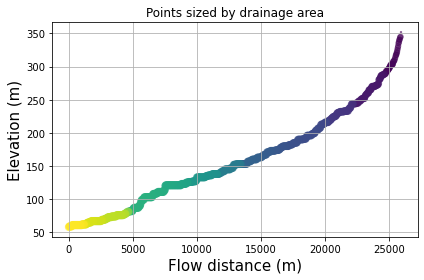

In [36]:
%matplotlib inline

fig, ax = plt.subplots()
ax.scatter(fd, z, c=da, s=logda, alpha=0.5)

ax.set_xlabel(r'Flow distance (m)', fontsize=15)
ax.set_ylabel(r'Elevation (m)', fontsize=15)
ax.set_title('Points sized by drainage area')

ax.grid(True)
fig.tight_layout()

plt.show()

Now remove points below 150 m elevation

In [42]:
pointdata2 = pointdata
pointdata2.selectValue("elevation(m)",value = 149.999, operator=">")

I am selecting your data for specific elevation(m)


In [43]:
fd = pointdata2.QueryData("flow distance(m)")
z =  pointdata2.QueryData("elevation(m)")
da = pointdata2.QueryData("drainage area (m^2)")

In [44]:
da = np.asarray(da)
logda = np.log(da)
damin = np.min(logda)
damax = np.max(logda)
logda = np.subtract(logda,damin)
logda = np.divide(logda,(damax-damin))
logda = np.multiply(logda,50)
logda = np.add(logda,2)

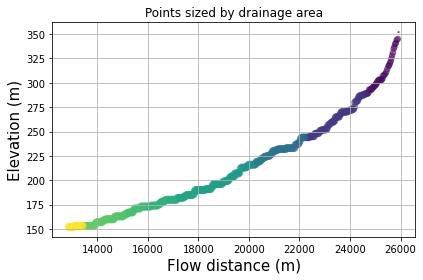

In [45]:
fig, ax = plt.subplots()
ax.scatter(fd, z, c=da, s=logda, alpha=0.5)

ax.set_xlabel(r'Flow distance (m)', fontsize=15)
ax.set_ylabel(r'Elevation (m)', fontsize=15)
ax.set_title('Points sized by drainage area')

ax.grid(True)
fig.tight_layout()

plt.show()